<img src="tic3151.png" style="height: 70px; width: 200px" align=left> 
<img src="logo-MMU.png" style="height: 70px; width: 200px" align=right> 

# Basic Investigation

### Install libraries (If haven)

In [10]:
#!pip install dython
#!pip install -U scikit-learn

### Load Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import associations
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn import metrics

### Load Dataset

In [2]:
df = pd.read_csv('Bank_CreditScoring.csv') 
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8


In [4]:
#check dataset's info
print(f'Shape: {df.shape}\n')
df.info()

Shape: (2350, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Credit_Card_Exceed_Months          2350 non-null   int64 
 1   Employment_Type                    2350 non-null   object
 2   Loan_Amount                        2350 non-null   int64 
 3   Loan_Tenure_Year                   2350 non-null   int64 
 4   More_Than_One_Products             2350 non-null   object
 5   Credit_Card_More_Than_Months       2350 non-null   int64 
 6   Number_of_Dependents               2350 non-null   int64 
 7   Years_to_Financial_Freedom         2350 non-null   int64 
 8   Number_of_Credit_Card_Facility     2350 non-null   int64 
 9   Number_of_Properties               2350 non-null   int64 
 10  Number_of_Bank_Products            2350 non-null   int64 
 11  Number_of_Loan_to_Approve          2350 non-null  

In [5]:
#check unique values for each features

for col, name in zip(df, df.columns):
    print(f'{name}: ')
    print(f'{df[col].unique()} \n')

Credit_Card_Exceed_Months: 
[1 6 2 7 3 4 5] 

Employment_Type: 
['employer' 'Self_Employed' 'government' 'employee' 'Fresh_Graduate'] 

Loan_Amount: 
[456509 605505 294133 ... 321921 393555 270677] 

Loan_Tenure_Year: 
[16 19 20 14 11 22 21 24 12 10 23 13 18 15 17] 

More_Than_One_Products: 
['yes' 'no'] 

Credit_Card_More_Than_Months: 
[1 2 3 4 5] 

Number_of_Dependents: 
[2 3 4 5 6] 

Years_to_Financial_Freedom: 
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Number_of_Credit_Card_Facility: 
[2 6 5 4 3] 

Number_of_Properties: 
[2 3 4 5] 

Number_of_Bank_Products: 
[1 2 3 5 4] 

Number_of_Loan_to_Approve: 
[1 2 3] 

Property_Type: 
['condominium' 'bungalow' 'terrace' 'flat'] 

Years_for_Property_to_Completion: 
[10 11 12 13] 

State: 
['Johor' 'Selangor' 'Kuala Lumpur' 'Penang' 'P.Pinang' 'Pulau Penang'
 'Johor B' 'K.L' 'N.Sembilan' 'N.S' 'Sarawak' 'Sabah' 'SWK' 'Trengganu'
 'Kedah'] 

Number_of_Side_Income: 
[2 1 3] 

Monthly_Salary: 
[12262  9251  4919 ...  4175  5011  9884] 

To

In [6]:
#describe categoriacl data

df.describe(include=['object'])

,Employment_Type,More_Than_One_Products,Property_Type,State,Decision
count,2350,2350,2350,2350,2350
unique,5,2,4,15,2
top,Self_Employed,yes,condominium,Kuala Lumpur,Accept
freq,600,1175,880,850,1769


In [7]:
#describe continuous data

df.describe()

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score
count,2350.000000,2350.000000,2350.000000,2350.00000,2350.00000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2.350000e+03,2350.000000,2350.000000
mean,4.723404,448350.120851,17.053191,2.12766,3.12766,13.382979,3.744681,2.382979,2.106383,1.991915,10.659574,2.020426,7972.040000,9.435756e+05,13767.859574,7.496596
std,2.101127,202814.886797,4.352123,1.40874,1.40874,4.067090,1.391271,0.813707,1.533423,0.816717,1.077590,0.818325,2588.330436,2.909033e+05,3591.707735,1.112542
min,1.000000,100194.000000,10.000000,1.00000,2.00000,5.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,3583.000000,4.202390e+05,7523.000000,6.000000
25%,3.000000,273169.250000,13.000000,1.00000,2.00000,10.000000,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,5737.750000,7.007870e+05,10751.500000,6.000000
50%,5.000000,447251.500000,17.000000,1.00000,2.00000,14.000000,4.000000,2.000000,1.000000,2.000000,10.000000,2.000000,7982.500000,9.375275e+05,13689.500000,8.000000
75%,7.000000,623714.000000,21.000000,3.00000,4.00000,17.000000,5.000000,2.000000,3.000000,3.000000,11.000000,3.000000,10227.750000,1.197191e+06,16916.250000,8.000000
max,7.000000,799628.000000,24.000000,5.00000,6.00000,19.000000,6.000000,5.000000,5.000000,3.000000,13.000000,3.000000,12562.000000,1.449960e+06,19995.000000,9.000000


### Find correlation between variables
* Decision and Score
* Correlation between all variables
* Decision with other variables

#### Decision and Score

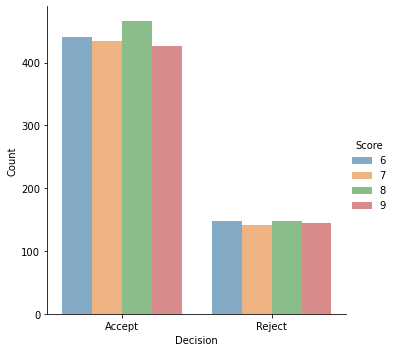

In [8]:
# Find relationship of Decision and Score

df_decision_score = df.groupby(['Decision', 'Score']).size().reset_index().rename(columns = {0: 'Count'})
g = sns.catplot(
    data=df_decision_score, kind="bar", x="Decision", y="Count", hue="Score", alpha=.6
)

The number of acceptance and rejection for each score is similar. There is no relationship between score and decision. So we cant use the score to determine the correlation for other features.

#### Correlation between all variables

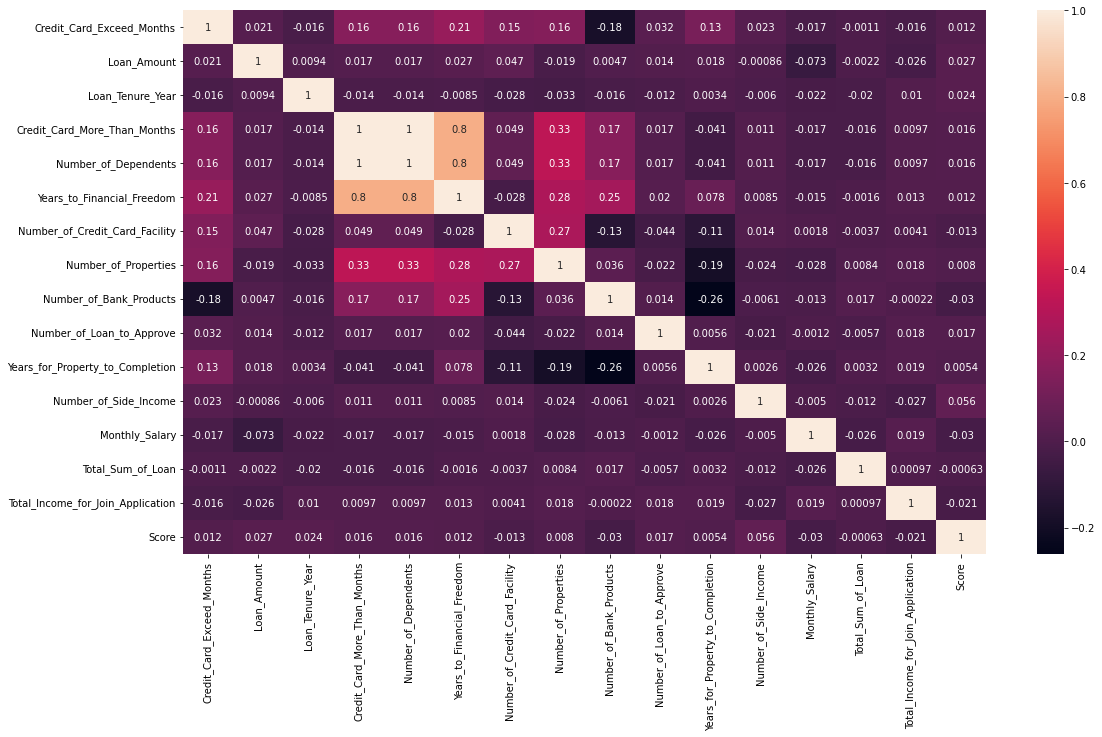

In [9]:
#Heatmap for continuous variables using Pairwise Correlation

sns.heatmap(df.corr(), annot = True)
fig = plt.gcf()
fig.set_size_inches(18, 10)

As we can see from the heatmap above, Employment_Type, More_Than_One_Products, Property_Type, State, and Decision are missing. This is because, we can't compare categorical variables with continuous variables if we use pandas.DataFrame.corr. 

Therefore we need dython.

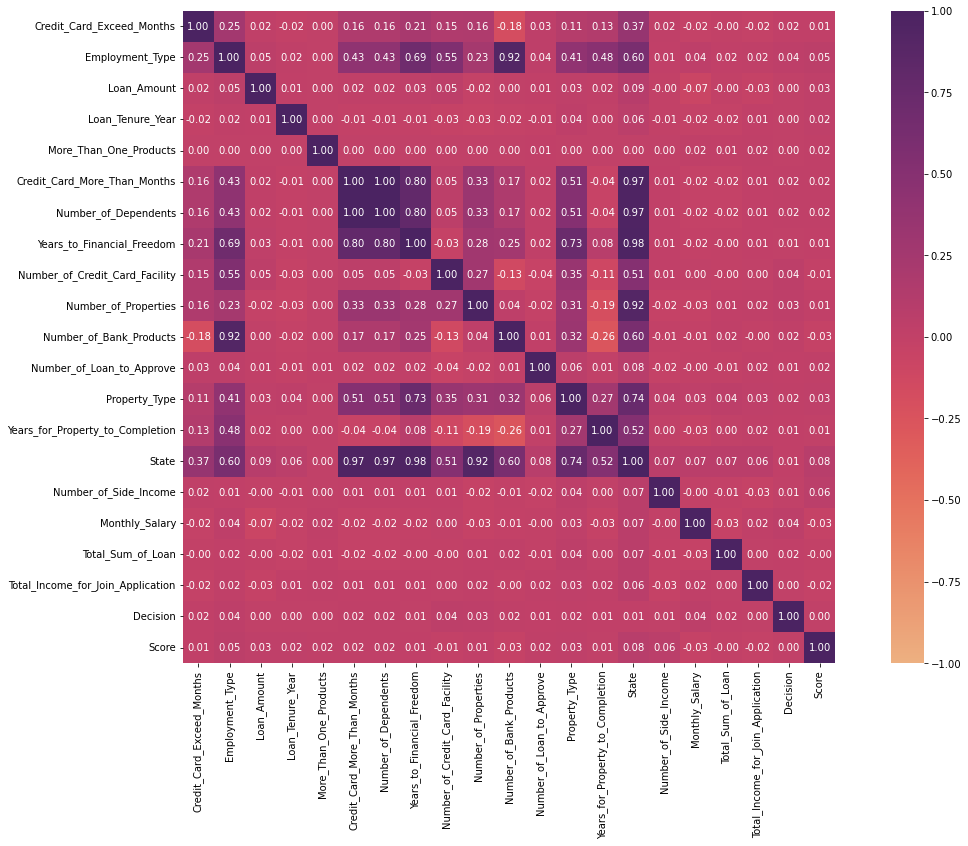

In [10]:
#Use dython to find correlation between categorical-continuous variables using Correlation Ratio

dython_correlation = associations(df, filename= 'dython_correlation.png', figsize=(20, 12), cmap='flare')

From the heatmap above we can see there are correlation between variables such that:
1. **Strong Positive Correlarion** 
> * Employment_Type -> Number_of_Bank_Products 
> * Credit_Card_More_Than_Months -> State, Years_to_Financial_Freedom, Number_of_Dependents
> * Number_of_Dependents -> State, Years_to_Financial_Freedom
> * Years_to_Financial_Freedom -> State, Property_Type, Number_of_Dependents, Credit_Card_More_Than_Months
> * Number_of_Properties -> State
> * Number_of_Bank_Products -> Employment_Type
> * State -> Number_of_Properties, Years_to_Financial_Freedom, Number_of_Dependents, Credit_Card_More_Than_Months
2. **Weak or Moderate Positive Correlarion**
> * Employment_Type -> Years_to_Financial_Freedom, Credit_Card_More_Than_Months, Number_of_Dependents
> * Credit_Card_More_Than_Months -> Property_Type, Number_of_Properties
> * Number_of_Dependents -> Property_Type, Number_of_Properties
> * Number_of_Credit_Card_Facility -> State, Employment_Type
> * Number_of_Properties -> Property_Type, Number_of_Credit_Card_Facility, Years_to_Financial_Freedom, Number_of_Dependents, Credit_Card_More_Than_Months
> * Number_of_Bank_Products -> State, Property_Type, Years_to_Financial_Freedom
> * Property_Type -> State, Years_for_Property_to_Completion, Number_of_Credit_Card_Facility, Number_of_Bank_Products, Number_of_Properties, Years_to_Financial_Freedom, Number_of_Dependents, Credit_Card_More_Than_Months
> * Years_for_Property_to_Completion -> State, Property_Type, Employment_Type
> * State -> Years_for_Property_to_Completion, Property_Type, Number_of_Bank_Products, Number_of_Credit_Card_Facility, Employment_Type, Credit_Card_Exceed_Months
3. **Weak Negative Correlarion**
> * Number_of_Bank_Products -> Years_for_Property_to_Completion
> * Years_for_Property_to_Completion -> Number_of_Bank_Products 

The variables that correlated most with other variables are **State**, **Property_Type**, and **Years_to_Financial_Freedom**  

#### Decision with other variables
We can already see the correlation of Decision with other variables from the heatmap above. But we do it again using spearman's corr just to double-check there is no error.

In [11]:
#check ans using Spearman’s correlation coefficient
#check decision vs other variables

for col in df:
    coef, p = spearmanr(df['Decision'], df[col])
    print(f'{col:>40}:{coef:.4f}')

               Credit_Card_Exceed_Months:-0.0120
                         Employment_Type:-0.0394
                             Loan_Amount:-0.0043
                        Loan_Tenure_Year:-0.0013
                  More_Than_One_Products:-0.0030
            Credit_Card_More_Than_Months:-0.0214
                    Number_of_Dependents:-0.0214
              Years_to_Financial_Freedom:-0.0116
          Number_of_Credit_Card_Facility:-0.0403
                    Number_of_Properties:-0.0344
                 Number_of_Bank_Products:0.0117
               Number_of_Loan_to_Approve:0.0118
                           Property_Type:0.0013
        Years_for_Property_to_Completion:0.0140
                                   State:-0.0280
                   Number_of_Side_Income:0.0060
                          Monthly_Salary:0.0443
                       Total_Sum_of_Loan:0.0155
       Total_Income_for_Join_Application:0.0007
                                Decision:1.0000
                             

Yes, we don't see and correlation between Decision and other variables here

### Data pre-processing before training and testing the models

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = pd.read_csv('Bank_CreditScoring.csv') 

df["Decision"] = df.Decision.map(dict(Accept=1, Reject=0)) #change string to int
test_df = pd.get_dummies(df, drop_first=True) #make sure no string type

print(f'Ori Shape: {test_df.shape}')

X = test_df.drop(['Decision', 'Score'], axis=1)
y = test_df['Decision'] 

bestfeatures = SelectKBest(score_func=chi2, k=10) #take 10 best features using chi-square
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
selection = featureScores.nlargest(10,'Score') #print 10 best features

col = selection.Feature.unique()
df_afterSelection = test_df.filter([x for x in col])
df_afterSelection['Decision'] = df['Decision']

print(f'After Shape: {df_afterSelection.shape}\n')

df_afterSelection

Ori Shape: (2350, 39)
After Shape: (2350, 11)



,Total_Sum_of_Loan,Loan_Amount,Monthly_Salary,Employment_Type_government,State_Penang,State_Kuala Lumpur,Property_Type_flat,State_Sarawak,Number_of_Credit_Card_Facility,Employment_Type_Self_Employed,Decision
0,853141,456509,12262,0,0,0,0,0,2,0,0
1,882901,605505,9251,0,0,0,0,0,2,0,1
2,540489,294133,4919,0,0,0,0,0,2,0,0
3,536727,490216,4459,0,0,0,0,0,2,0,1
4,774695,292728,5628,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2345,1388015,339461,10895,0,0,1,0,0,2,0,0
2346,1147984,690944,11971,0,0,1,0,0,2,0,1
2347,685580,321921,4175,0,0,1,0,0,2,0,1
2348,673748,393555,5011,0,0,1,0,0,2,0,0


## 1) Classification - Naive Bayes

In [14]:
#Library

from sklearn.naive_bayes import GaussianNB

In [49]:
#Build Naive Bayes Model

#df = pd.read_csv('Bank_CreditScoring.csv') 

X = df_afterSelection.drop(['Decision'], axis=1)
y = df_afterSelection['Decision']

#X = pd.get_dummies(X, drop_first=True) #make sure no string type
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

nb = GaussianNB()
nb.fit(X_train, y_train) 

GaussianNB()

In [50]:
y_train

1636    1
2183    0
133     1
1936    1
2155    0
       ..
960     0
905     1
1096    1
235     1
1061    1
Name: Decision, Length: 1645, dtype: int64

In [17]:
y

0       0
1       1
2       0
3       1
4       0
       ..
2345    0
2346    1
2347    1
2348    0
2349    1
Name: Decision, Length: 2350, dtype: int64

In [18]:
#Test the model
y_pred = nb.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
#Accuracy

nb.score(X_test, y_test)

0.7787234042553192

In [20]:
# Cross Validation Classification Confusion Matrix

matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[  0 156]
 [  0 549]]


In [22]:
#Cross-Validation. By default this is using accuracy metric
from sklearn.model_selection import cross_validate

cv_model = cross_validate(nb, X, y, cv=3, return_estimator=True, return_train_score=True, verbose=2)

print(f'Train scores: {cv_model["train_score"]}')
print(f'Train scores mean: {cv_model["train_score"].mean()}')
print(f'Test scores: {cv_model["test_score"]}')
print(f'Test scores mean: {cv_model["test_score"].mean()}')

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Train scores: [0.75287356 0.75303127 0.75239311]
Train scores mean: 0.7527659803367834
Test scores: [0.75255102 0.75223499 0.75351213]
Test scores mean: 0.752766048948315


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [23]:
#save model

import pickle

best_nb_model = cv_model['estimator'][0] #Choose the best

with open('nb_model.pkl', 'wb') as file:
    pickle.dump(best_nb_model, file)

## 2) Classification - Decision Tree

In [24]:
#Library

from sklearn.tree import DecisionTreeClassifier 

In [26]:
#Build Decision Tree Model

X = df_afterSelection.drop(['Decision'], axis=1)
y = df_afterSelection['Decision']

#X = pd.get_dummies(X, drop_first=True) #make sure no string type
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)

In [51]:
y

0       0
1       1
2       0
3       1
4       0
       ..
2345    0
2346    1
2347    1
2348    0
2349    1
Name: Decision, Length: 2350, dtype: int64

In [28]:
#Test the model

y_pred = dtc.predict(X_test) 
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5943262411347517


In [30]:
# Cross Validation Classification Confusion Matrix

matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

[[ 41 115]
 [171 378]]


In [31]:
#Cross-Validation. By default this is using accuracy metric
from sklearn.model_selection import cross_validate

cv_model = cross_validate(dtc, X, y, cv=3, return_estimator=True, return_train_score=True, verbose=2)

print(f'Train scores: {cv_model["train_score"]}')
print(f'Train scores mean: {cv_model["train_score"].mean()}')
print(f'Test scores: {cv_model["test_score"]}')
print(f'Test scores mean: {cv_model["test_score"].mean()}')

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Train scores: [1. 1. 1.]
Train scores mean: 1.0
Test scores: [0.58163265 0.60280971 0.59131545]
Test scores mean: 0.5919192709012085


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [52]:
#save model

import pickle

best_dtc_model = cv_model['estimator'][1] #Choose the best

with open('dtc_model.pkl', 'wb') as file:
    pickle.dump(best_dtc_model, file)

## 3) Cluster - K-means

In [34]:
#Library

from sklearn.cluster import KMeans 

In [35]:
#Get X and y

X = df_afterSelection.drop(['Decision'], axis=1)
y = df_afterSelection['Decision']

#X = pd.get_dummies(X, drop_first=True) 
X.head()

,Total_Sum_of_Loan,Loan_Amount,Monthly_Salary,Employment_Type_government,State_Penang,State_Kuala Lumpur,Property_Type_flat,State_Sarawak,Number_of_Credit_Card_Facility,Employment_Type_Self_Employed
0,853141,456509,12262,0,0,0,0,0,2,0
1,882901,605505,9251,0,0,0,0,0,2,0
2,540489,294133,4919,0,0,0,0,0,2,0
3,536727,490216,4459,0,0,0,0,0,2,0
4,774695,292728,5628,0,0,0,0,0,2,0


In [36]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X

,Total_Sum_of_Loan,Loan_Amount,Monthly_Salary,Employment_Type_government,State_Penang,State_Kuala Lumpur,Property_Type_flat,State_Sarawak,Number_of_Credit_Card_Facility,Employment_Type_Self_Employed
0,0.420407,0.509433,0.966589,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.449308,0.722457,0.631251,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.116779,0.277280,0.148792,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.113126,0.557625,0.097561,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.344225,0.275271,0.227754,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2345,0.939843,0.342087,0.814345,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2346,0.706740,0.844612,0.934180,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2347,0.257682,0.317009,0.065932,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2348,0.246192,0.419426,0.159038,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
# Applying the k-Means approach for k=2

km = KMeans(n_clusters = 2, random_state=1)
km.fit(X)

#Create a copy of df and merge the newly predicted labels back

df_kMeans = df_afterSelection.copy()
df_kMeans = df_kMeans.drop(['Decision'], axis=1)
df_kMeans['predicted_Decision']=km.labels_

df_kMeans

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Total_Sum_of_Loan,Loan_Amount,Monthly_Salary,Employment_Type_government,State_Penang,State_Kuala Lumpur,Property_Type_flat,State_Sarawak,Number_of_Credit_Card_Facility,Employment_Type_Self_Employed,predicted_Decision
0,853141,456509,12262,0,0,0,0,0,2,0,1
1,882901,605505,9251,0,0,0,0,0,2,0,1
2,540489,294133,4919,0,0,0,0,0,2,0,1
3,536727,490216,4459,0,0,0,0,0,2,0,1
4,774695,292728,5628,0,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2345,1388015,339461,10895,0,0,1,0,0,2,0,0
2346,1147984,690944,11971,0,0,1,0,0,2,0,0
2347,685580,321921,4175,0,0,1,0,0,2,0,0
2348,673748,393555,5011,0,0,1,0,0,2,0,0


In [38]:
# Check inertia

km.inertia_

2062.1754412678433

<AxesSubplot:xlabel='Total_Sum_of_Loan', ylabel='Monthly_Salary'>

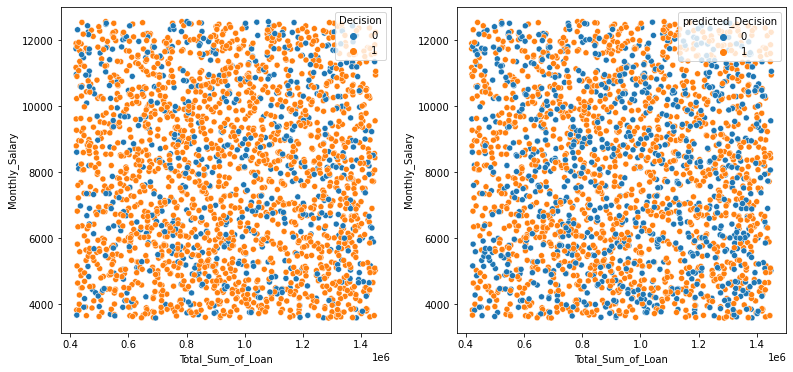

In [39]:
#Create plots to visualise the difference

fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="Total_Sum_of_Loan", y="Monthly_Salary", hue='Decision', data=df_afterSelection, ax=axes[0])
sns.scatterplot(x="Total_Sum_of_Loan", y="Monthly_Salary", hue='predicted_Decision', data=df_kMeans, ax=axes[1])

In [40]:
# check how many of the samples were correctly labeled

labels = km.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1389 out of 2350 samples were correctly labeled.


In [41]:
print(metrics.confusion_matrix(df['Decision'],km.labels_))

[[ 235  346]
 [ 615 1154]]


In [42]:
metrics.accuracy_score(df.Decision, labels)

0.591063829787234

In [43]:
#save model

with open('km_model.pkl', 'wb') as file:
    pickle.dump(km, file)

# Ignore

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ut

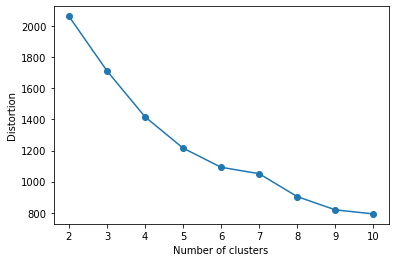

In [44]:
#Identify the k value

distortions = []
for i in range(2,11):
    km = KMeans(
        n_clusters = i, init = 'random',
        n_init = 10, max_iter = 300,
        tol = 1e-04, random_state = 0
    )
    km.fit(X)
    distortions.append(km.inertia_)
    
#plot

plt.plot(range(2,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


4 and 5 seems to be the elbow here. Therefore I will try 4 and 5 then compare their accuarcy.

### Applying the k-Means approach for k=4

In [45]:
km = KMeans(n_clusters = 4, random_state=1)
km.fit(X)
km.labels_.tolist()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


### Create a copy of df and merge the newly predicted labels back

In [46]:
df_kMeans = df.copy()
df_kMeans = df_kMeans.drop(['Decision', 'Score'], axis=1)
df_kMeans['y']=km.labels_

In [47]:
df_kMeans

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,y
0,1,employer,456509,16,yes,1,2,5,2,2,1,1,condominium,10,Johor,2,12262,853141,16025,1
1,1,employer,605505,19,no,1,2,5,2,2,1,2,condominium,10,Johor,2,9251,882901,17082,1
2,1,employer,294133,19,yes,1,2,5,2,2,1,3,condominium,10,Johor,2,4919,540489,12613,1
3,1,employer,490216,20,no,1,2,5,2,2,1,1,condominium,10,Johor,1,4459,536727,10952,1
4,1,employer,292728,14,yes,1,2,5,2,2,1,2,condominium,10,Johor,3,5628,774695,11209,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,Fresh_Graduate,339461,15,no,2,3,15,2,2,5,2,terrace,11,Kuala Lumpur,1,10895,1388015,15256,0
2346,6,Fresh_Graduate,690944,13,yes,2,3,15,2,2,5,2,terrace,11,Kuala Lumpur,3,11971,1147984,11842,0
2347,6,Fresh_Graduate,321921,13,no,2,3,15,2,2,5,2,terrace,11,Kuala Lumpur,1,4175,685580,16619,0
2348,6,Fresh_Graduate,393555,14,yes,2,3,15,2,2,5,2,terrace,11,Kuala Lumpur,2,5011,673748,13892,0


### Create plots to visualise the difference

<AxesSubplot:xlabel='Monthly_Salary', ylabel='Loan_Amount'>

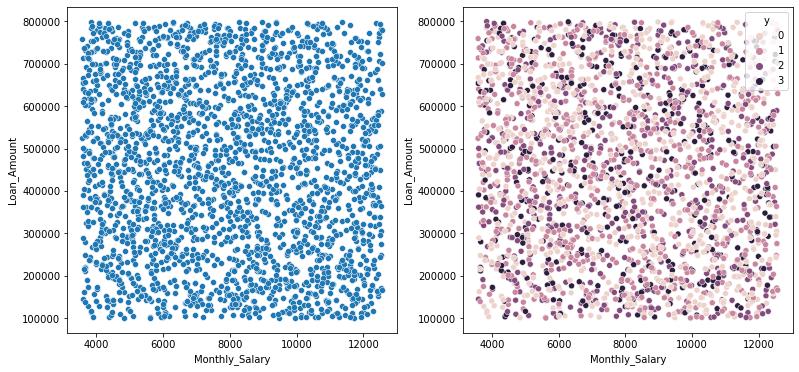

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

sns.scatterplot(x="Monthly_Salary", y="Loan_Amount", data=df, ax=axes[0])
sns.scatterplot(x="Monthly_Salary", y="Loan_Amount", hue='y', data=df_kMeans, ax=axes[1])